In [1]:
import numpy as np
import matplotlib.pyplot as plt
from species import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


In [2]:
# Get names of the species
data = open('species')
Name = np.zeros(500).astype(np.str)
length=len('krome_idx_')
i=0
while 1:
    line = data.readline()
    if not line:
        break
    line=line.strip('\n')
    temp=line[length:line.find(' ')]
    if (temp[-1]=='J'):
        temp=temp[0:-1]+'j'
    Name[i]=temp
    i += 1

In [3]:
def deal_with(data):
    leng=5
    l=len(data[:,1])
    dat=data
    small,big=np.zeros((l,leng)),np.zeros((l,leng))
    big_index,small_index=np.zeros((l,leng)),np.zeros((l,leng))
    for i in range(l):
        dati=dat[i,:]
        sor1 = dati.argsort()[1:leng+1] #sort, find the smallest
        sor2 = dati.argsort()[-leng:len(dati)] #biggest
        big_index[i,:]=sor2+1
        small_index[i,:]=sor1+1
        for j in range(leng):
            big[i,j]=dati[sor2[j]]
            small[i,j]=dati[sor1[j]]    
    return(big,small,big_index,small_index)

In [4]:
def read_name(index):
    name=np.zeros((int(l/453),5)).astype(np.str)
    for i in range(int(l/453)):
        for j in range(5):
            name[i,j]=Name[int(index[i,j]-1)]
    return(name)

In [5]:
def draw_evo(data, *spe):
    for i in spe:
        if not i in Name:
            print('Name', i, 'is not valid!')
            return
        else:
            T = data[:,0]
            y = data[:,eval('krome_idx_' + i)]
            Y = np.log10(abs(y))
            plt.semilogx(T, Y, label = i)
            plt.xlabel(r'$r$ (yr)')
            plt.ylabel(r'$\log\delta$ (per hydrogen atom)')

In [6]:
def info(t_data, *dis):
    for i in dis:
        if not (i-1) in range(8):
            print('Invalid distance', i)
            return
        b, s, b_in, s_in = deal_with(t_data[i-1][:, 1:454])
        b_name=read_name(b_in)
        s_name=read_name(s_in)
        print('dis=', i, 'kpc')
        print('Formation')
        print(b_name)
        #print(b)
        print('Destruction')
        print(s_name)
        #print(s)
        print()

In [7]:
# 别动！很慢！！！
tr_raw = []
for i in range(8):
    temp = np.loadtxt('Trace'+str(i+1))
    tr_raw.append(temp)
# 别动！很慢！！！

In [26]:
l = len(tr_raw[0])
tr = np.array(tr_raw).reshape(8,int(l/453),453,454)
t_data = []
for i in range(8):
    t_data.append(tr[i, :, krome_idx_HE-1, :])

In [27]:
info(t_data, 1, 8)

dis= 1 kpc
Formation
[['CN' 'CS' 'H2' 'E' 'HEj']
 ['E' 'CO' 'H2' 'CS' 'HEj']
 ['CO' 'H2' 'SIO' 'CS' 'HEj']
 ['H2' 'CO' 'CS' 'SIO' 'HEj']
 ['H2O' 'CO' 'SIO' 'CS' 'HEj']
 ['SIO' 'CS' 'H2O' 'CO' 'HEj']
 ['N2' 'SIO' 'H2O' 'CO' 'HEj']
 ['H2O' 'SO' 'CO' 'SIO' 'HEj']
 ['SO2' 'CO' 'SIO' 'SO' 'HEj']
 ['SO2' 'CO' 'SIO' 'SO' 'HEj']
 ['SO2' 'CO' 'SIO' 'SO' 'HEj']]
Destruction
[['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']
 ['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']
 ['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']
 ['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']
 ['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']
 ['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']
 ['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']
 ['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']
 ['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']
 ['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']
 ['C4H2j' 'C2H5Oj' 'COOCH4j' 'C8j' 'C7Hj']]

dis= 8 kpc
Formation
[['CN' 'CS' 'H2' 'E' 'HEj']
 ['E' 'CO' 'H2' 'CS' 'HEj']
 ['CO' 'H2' 'SIO' 'CS' 'HEj']
 ['H2' 'CO' 'CS' 'SIO' 'HEj']
 ['H2O' 'CO' 'SIO' 'C

/Users/chang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


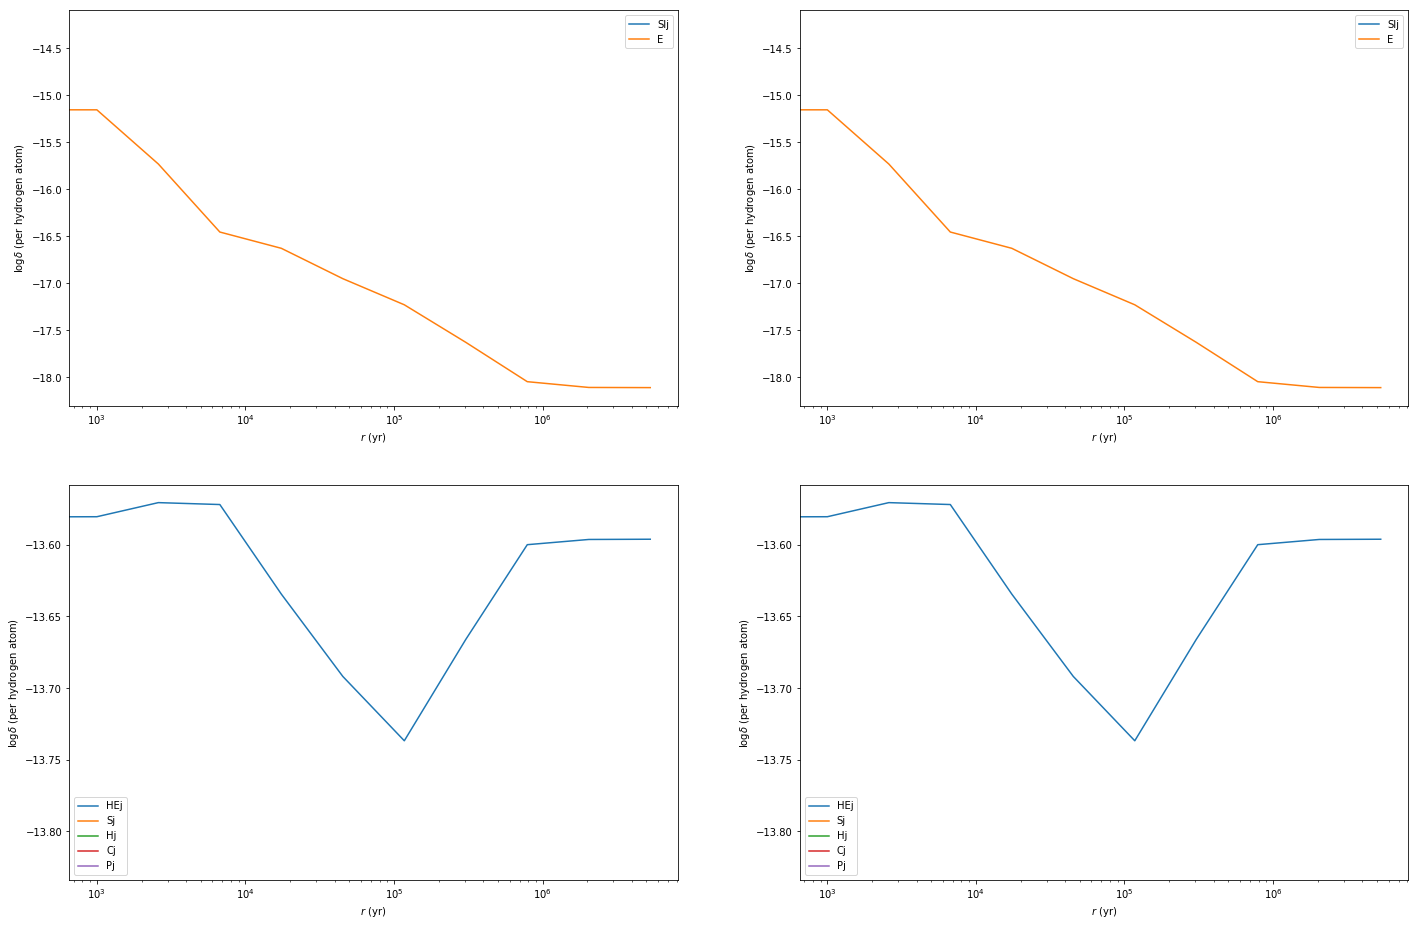

In [28]:
ax = plt.figure(figsize=(24,16))
plt.subplot(221)
draw_evo(t_data[2], 'SIj', 'E')
plt.legend()
plt.subplot(222)
draw_evo(t_data[3], 'SIj', 'E')
plt.legend()
plt.subplot(223)
draw_evo(t_data[2], 'HEj', 'Sj', 'Hj', 'Cj', 'Pj')
plt.legend()
plt.subplot(224)
draw_evo(t_data[3], 'HEj', 'Sj', 'Hj', 'Cj', 'Pj')
plt.legend()